# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

***--> Treinando com preditor - quartos.***
1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

Visualmente, o modelo com tamanho apresenta uma relação mais clara e forte com o preço dos imóveis: os pontos no gráfico se alinham melhor à reta de regressão, indicando uma relação linear mais evidente.
Já o modelo com número de quartos mostra maior dispersão dos pontos em relação à reta, sugerindo que esse atributo sozinho não explica bem a variação dos preços.

2) O RSS e R^2 corroboram suas impressões observando o modelo?

O modelo treinado com tamanho apresenta um RSS menor e um R² maior (aproximadamente 73,10%), indicando que explica melhor a variação dos preços dos imóveis.
O modelo treinado com número de quartos tem um RSS maior e um R² bem menor (aproximadamente 19,56%), mostrando que esse preditor sozinho não explica bem o preço.
Esses resultados quantitativos confirmam a análise visual: o atributo tamanho é um preditor muito mais forte e razoável para o preço dos imóveis do que o número de quartos.




In [1]:
import pandas as pd

dados_adv = pd.read_csv('data/Portland_housePrices.csv', index_col=0)
dados_adv.head()

,quartos,preco
tamanho,,
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900


In [2]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
from sklearn.linear_model import LinearRegression

X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [4]:
print(f"Coeficiente angular (inclinação): {reg.coef_[0][0]}")
print(f"Coeficiente linear (intercepto): {reg.intercept_[0]}")

Coeficiente angular (inclinação): 72669.64776357826
Coeficiente linear (intercepto): 110034.41453674127


In [5]:
y_hat = reg.predict(X[0:4])
y_hat

array([[328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [255373.7100639 ]])

Text(0, 0.5, 'Preço')

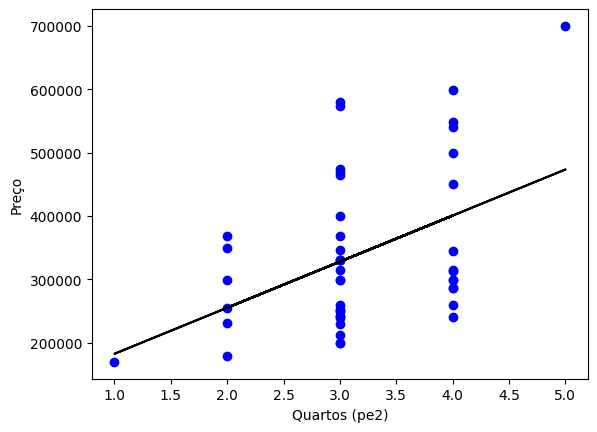

In [6]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='b')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Quartos (pe2)')
plt.ylabel('Preço')

In [7]:
resultado = pd.DataFrame({
    'Quartos': X.iloc[0:4, 0],
    'Preço Real': y.iloc[0:4, 0],
    'Preço Previsto': y_hat.flatten()
})
print(resultado)


   Quartos  Preço Real  Preço Previsto
0        3      399900   328043.357827
1        3      329900   328043.357827
2        3      369000   328043.357827
3        2      232000   255373.710064


In [8]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return ((predicted - y) ** 2).sum().item()

def calc_r2(y,predicted):
    return r2_score(y,predicted)

rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

578535325112.5248
0.19559489565340482


# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

***--> TV e newspaper***

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

O gráfico mostra que a relação entre investimento em TV e vendas é mais forte e linear: os pontos se alinham melhor à reta de regressão. Já para newspaper, os pontos ficam mais dispersos, indicando pouca relação linear.


2) Qual dos modelos é melhor? como você chegou a esta conclusão?

O modelo com o preditor TV é melhor.

Como cheguei a essa conclusão:

O modelo treinado com TV apresentou um RSS menor (2102,53) e um R² maior (aproximadamente 61,19%), indicando que explica melhor a variação das vendas.
O modelo treinado com newspaper teve um RSS maior (5134,80) e um R² muito baixo (aproximadamente 5,21%), mostrando que esse preditor sozinho não explica bem as vendas.

In [9]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
from sklearn.linear_model import LinearRegression
X = dados_adv.loc[:,['TV']]
y = dados_adv.loc[:,['sales']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [11]:
print(f"Coeficiente angular (inclinação): {reg.coef_[0][0]}")
print(f"Coeficiente linear (intercepto): {reg.intercept_[0]}")

Coeficiente angular (inclinação): 0.04753664043301975
Coeficiente linear (intercepto): 7.032593549127695


In [12]:
y_hat = reg.predict(X[0:4])
y_hat

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457]])

Text(0, 0.5, 'sales')

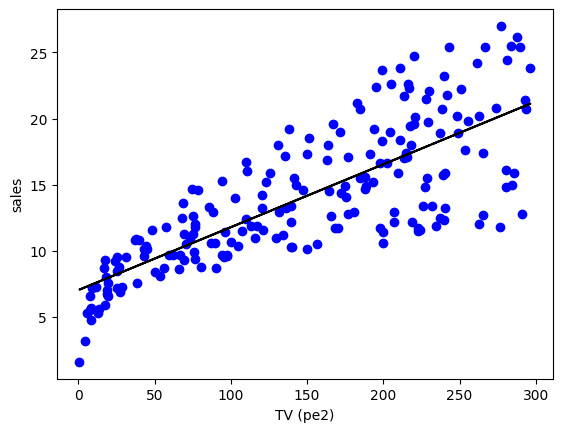

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='b')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('TV (pe2)')
plt.ylabel('sales')

In [14]:
resultado = pd.DataFrame({
    'TV': X.iloc[0:4, 0],
    'Preço Real': y.iloc[0:4, 0],
    'Preço Previsto': y_hat.flatten()
})
print(resultado)

      TV  Preço Real  Preço Previsto
1  230.1        22.1       17.970775
2   44.5        10.4        9.147974
3   17.2         9.3        7.850224
4  151.5        18.5       14.234395


In [15]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return ((predicted - y) ** 2).sum().item()

def calc_r2(y,predicted):
    return r2_score(y,predicted)

rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

2102.5305831313512
0.611875050850071


In [16]:
from sklearn.linear_model import LinearRegression
X = dados_adv.loc[:,['newspaper']]
y = dados_adv.loc[:,['sales']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [17]:
print(f"Coeficiente angular (inclinação): {reg.coef_[0][0]}")
print(f"Coeficiente linear (intercepto): {reg.intercept_[0]}")

Coeficiente angular (inclinação): 0.05469309847227336
Coeficiente linear (intercepto): 12.35140706927816


In [18]:
y_hat = reg.predict(X[0:4])
y_hat

array([[16.13616948],
       [14.81806581],
       [16.14163879],
       [15.55095333]])

Text(0, 0.5, 'sales')

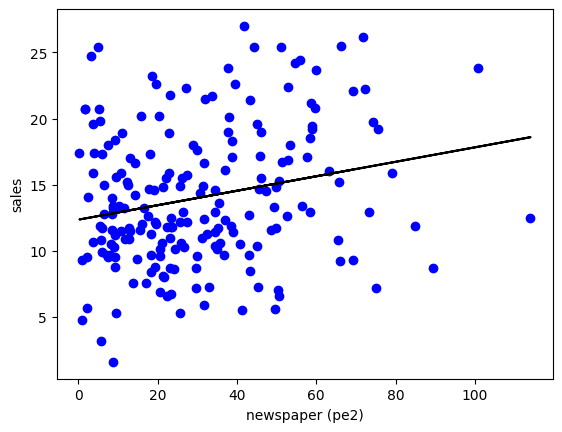

In [19]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='b')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('newspaper (pe2)')
plt.ylabel('sales')

In [20]:
resultado = pd.DataFrame({
    'newspaper': X.iloc[0:4, 0],
    'Preço Real': y.iloc[0:4, 0],
    'Preço Previsto': y_hat.flatten()
})
print(resultado)

   newspaper  Preço Real  Preço Previsto
1       69.2        22.1       16.136169
2       45.1        10.4       14.818066
3       69.3         9.3       16.141639
4       58.5        18.5       15.550953


In [21]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return ((predicted - y) ** 2).sum().item()

def calc_r2(y,predicted):
    return r2_score(y,predicted)

rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

5134.804544111939
0.05212044544430516


# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

O modelo KNN foi melhor que a regressão linear tanto em precisão (RSS) e também em capacidade explicativa (R²) no conjunto de dados TV ads.
O que quer dizer que a relação entre os  atributos preditor e predito não seja linear, e o KNN, que é um modelo não paramétrico e baseado em vizinhança,
conseguiu se adaptar mais aos dados.


2. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;

    R^2 no treino de 0,7633 indica que o modelo tem boa variabilidade dos preços no conjunto de treino - cerca de 76%. RSS alto devido aos valores. O R² no teste é de 0,5263, isso quer dizer que o desempenho caiu significativamente com dados novos. O modelo explica só cerca de 52% da variabilidade dos preços de imoveis novos. Conclusão = provável overfitting. O modelo não generaliza bem para dados novos ou o tamanho do imóivel, sozinho não é suficiente para prever o preço com precisão.

    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?

    O modelo treinado com dataset completos  - R^2 de 73%  tive melhor desenpenho, mas isso podem enganar - dar uma false idéia de generalização.


In [ ]:
#3.1

In [22]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
# 1. Seleção das variáveis
X = dados_por[['tamanho']]  # preditor (como DataFrame)
y = dados_por['preco']      # variável alvo (como Series)

In [24]:
# 2. Escalonamento
#scaler = StandardScaler()
X_escalado = X #scaler.fit_transform(X)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
# 3. Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_escalado, y)

KNeighborsRegressor()

In [27]:
# 4. Previsão no próprio conjunto
y_predito = knn.predict(X_escalado)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# 5. Avaliação
print("R²:", r2_score(y, y_predito))
print("MSE:", mean_squared_error(y, y_predito))

R²: 0.7612495463129668
MSE: 3653435225.139575


In [30]:
# 6. Comparação
import pandas as pd
comparacao = pd.DataFrame({
    'Preço Real': y.values,
    'Preço Previsto': y_predito,
    'Erro Percentual (%)': ((y.values - y_predito) / y.values * 100).round(2)
})

print(comparacao.head())
print("\nErro percentual médio:", comparacao['Erro Percentual (%)'].mean())


   Preço Real  Preço Previsto  Erro Percentual (%)
0      399900        364360.0                 8.89
1      329900        299740.0                 9.14
2      369000        386360.0                -4.70
3      232000        271479.8               -17.02
4      539900        503739.6                 6.70

Erro percentual médio: -2.397021276595744


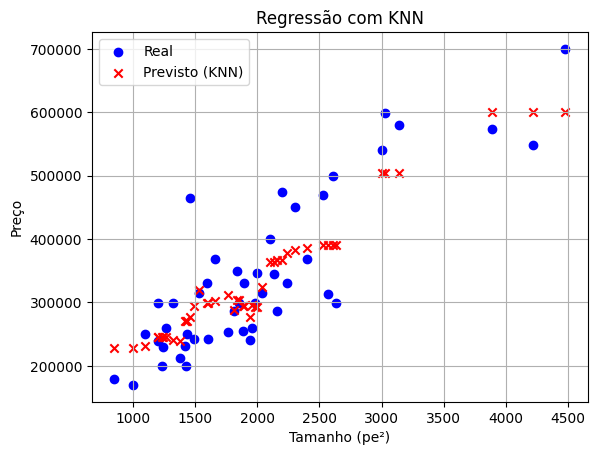

In [31]:
"""
from matplotlib import pyplot as plt

plt.scatter(X, y,color='b')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')
"""

from matplotlib import pyplot as plt

# Predição feita com dados escalonados
y_predito = knn.predict(X_escalado)

# Gráfico com X original (não escalado)
plt.scatter(X, y, color='blue', label='Real')
plt.scatter(X, y_predito, color='red', label='Previsto (KNN)', marker='x')

plt.xlabel('Tamanho (pe²)')
plt.ylabel('Preço')
plt.title('Regressão com KNN')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
from sklearn.metrics import r2_score

# 1. Função para calcular RSS
def calc_rss(y, predicted):
    return ((predicted - y) ** 2).sum().item()

# 2. Função para calcular R²
def calc_r2(y, predicted):
    return r2_score(y, predicted)

# 3. Predição com KNN
y_predito = knn.predict(X_escalado)

# 4. Cálculo das métricas
rss = calc_rss(y, y_predito)
r2 = calc_r2(y, y_predito)

print('Soma Erro Quadratido COM KNN =>')
print("RSS:", rss)
print("R²:", r2)

Soma Erro Quadratido COM KNN =>
RSS: 171711455581.56003
R²: 0.7612495463129668


In [33]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X = dados_adv[['TV']]
y = dados_adv['sales']

In [49]:
# 2. Escalonamento
scaler = StandardScaler()
X_escalado = X 
scaler.fit_transform(X)

array([[ 1.31415422e-01],
       [-5.09640698e-01],
       [ 5.07908699e-01],
       [-7.43677059e-01],
       [ 1.27107075e+00],
       [-1.99450507e-02],
       [-5.93588523e-01],
       [-7.29685755e-01],
       [-7.89466782e-01],
       [-6.44465993e-01],
       [-7.71822042e-02],
       [-8.65999486e-04],
       [-1.40779041e-01],
       [ 3.15099326e+00],
       [-9.31923697e-01],
       [ 3.80715024e-01],
       [-8.65782986e-01],
       [-9.72625673e-01],
       [ 7.73743478e-01],
       [ 1.31050078e+00],
       [-2.97227261e-01],
       [-1.43322915e-01],
       [-5.04552951e-01],
       [-4.91995958e-02],
       [ 2.40309445e+00],
       [-1.14560907e+00],
       [-6.90255715e-01],
       [ 6.68172729e-01],
       [ 2.53521350e-01],
       [ 8.09357707e-01],
       [-2.05647815e-01],
       [-1.27280274e+00],
       [ 5.00114703e-02],
       [ 1.44532608e+00],
       [-2.41262044e-01],
       [-7.16966387e-01],
       [-9.68809863e-01],
       [ 1.67029651e-01],
       [ 2.8

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# 3. Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_escalado, y)

KNeighborsRegressor()

In [52]:
# 4. Previsão no próprio conjunto
y_predito = knn.predict(X_escalado)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
# 5. Avaliação
print('KNN-por-imoveis')
print("R²:", r2_score(y, y_predito))
print('Erro Quadratido Médio =>')
print("MSE:", mean_squared_error(y, y_predito))

KNN-por-imoveis
R²: 0.7612495463129668
Erro Quadratido Médio =>
MSE: 3653435225.139575


In [54]:
# 6. Comparação (opcional)
import pandas as pd
comparacao = pd.DataFrame({
    'Preço Real': y,
    'Preço Previsto': y_predito
})
print(comparacao.head())

   Preço Real  Preço Previsto
0      399900        364360.0
1      329900        299740.0
2      369000        386360.0
3      232000        271479.8
4      539900        503739.6


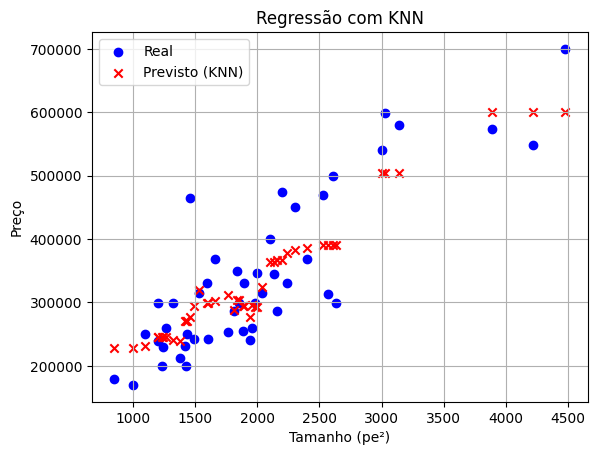

In [55]:

from matplotlib import pyplot as plt

# Predição feita com dados escalonados
y_predito = knn.predict(X_escalado)

# Gráfico com X original (não escalado)
plt.scatter(X, y, color='blue', label='Real')
plt.scatter(X, y_predito, color='red', label='Previsto (KNN)', marker='x')

plt.xlabel('Tamanho (pe²)')
plt.ylabel('Preço')
plt.title('Regressão com KNN')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
resultado = pd.DataFrame({
    'newspaper': X.iloc[0:4, 0],
    'Preço Real': y.iloc[0:4],
    'Preço Previsto': y_predito[:4].flatten()
})

print(resultado)

   newspaper  Preço Real  Preço Previsto
1      230.1        22.1        364360.0
2       44.5        10.4        299740.0
3       17.2         9.3        386360.0
4      151.5        18.5        271479.8


In [56]:
from sklearn.metrics import r2_score

# 1. Função para calcular RSS
def calc_rss(y, predicted):
    return ((predicted - y) ** 2).sum().item()

# 2. Função para calcular R²
def calc_r2(y, predicted):
    return r2_score(y, predicted)

# 3. Predição com KNN
y_predito = knn.predict(X_escalado)

# 4. Cálculo das métricas
rss = calc_rss(y, y_predito)
r2 = calc_r2(y, y_predito)

print('Soma Erro Quadratido =>')
print("RSS:", rss)
print("R²:", r2)


Soma Erro Quadratido =>
RSS: 171711455581.56003
R²: 0.7612495463129668


In [ ]:
# 3.2

In [58]:
X = dados_por[['tamanho']]        # preditor
y = dados_por['preco']         # variável alvo (resposta)

"""
#formato original do prof
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]
"""

"\n#formato original do prof\nX = dados_por.loc[:,['tamanho']]\ny = dados_por.loc[:,['preco']]\n"

In [59]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# 2. Escalonar os dados
"""
scaler = StandardScaler()
X_treino_escalado = scaler.fit_transform(X_treino)
X_teste_escalado = scaler.transform(X_teste)
"""

X_treino_escalado = X_treino
X_teste_escalado = X_teste

# 4. Prever na partição de teste
from sklearn.linear_model import LinearRegression

# 3. Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_treino_escalado, y_treino)

# 5. Prever valores
y_treino_predito = modelo.predict(X_treino_escalado)
y_teste_predito = modelo.predict(X_teste_escalado)


In [60]:
# 6. Comparar com tabela
tabela_treino = pd.DataFrame({
    'Real (Treino)': y_treino.values,
    'Previsto (Treino)': y_treino_predito
})

tabela_teste = pd.DataFrame({
    'Real (Teste)': y_teste.values,
    'Previsto (Teste)': y_teste_predito
})

print("Comparação - Treino")
print(tabela_treino.head())

print("\nComparação - Teste")
print(tabela_teste.head())

Comparação - Treino
   Real (Treino)  Previsto (Treino)
0         212000      245184.750948
1         232000      250021.618509
2         314900      265875.795514
3         368500      283342.261706
4         579900      481250.759405

Comparação - Teste
   Real (Teste)  Previsto (Teste)
0        469000     399158.368302
1        287000     350252.262965
2        464500     255664.630663
3        299000     221000.413144
4        573900     582421.905887


In [61]:
from sklearn.metrics import r2_score
def calc_rss(real,predicted):
    return ((predicted - real) ** 2).sum().item()

def calc_r2(real,predicted):
    return r2_score(real,predicted)

#Treino-Modelo
rss = calc_rss(y_treino, y_treino_predito)
r2 = calc_r2(y_treino, y_treino_predito)

print('Treino-Modelo de regressao linear-por-imoveis')
print(rss)
print(r2)

#Teste-Modelo
rss = calc_rss(y_teste, y_teste_predito)
r2 = calc_r2(y_teste, y_teste_predito)

print('***')
print('Treino-Modelo de regressao linear-por-imoveis')
print(rss)
print(r2)

Treino-Modelo de regressao linear-por-imoveis
115970368456.87866
0.7633332190114398
***
Treino-Modelo de regressao linear-por-imoveis
84077890604.8984
0.526301453884142


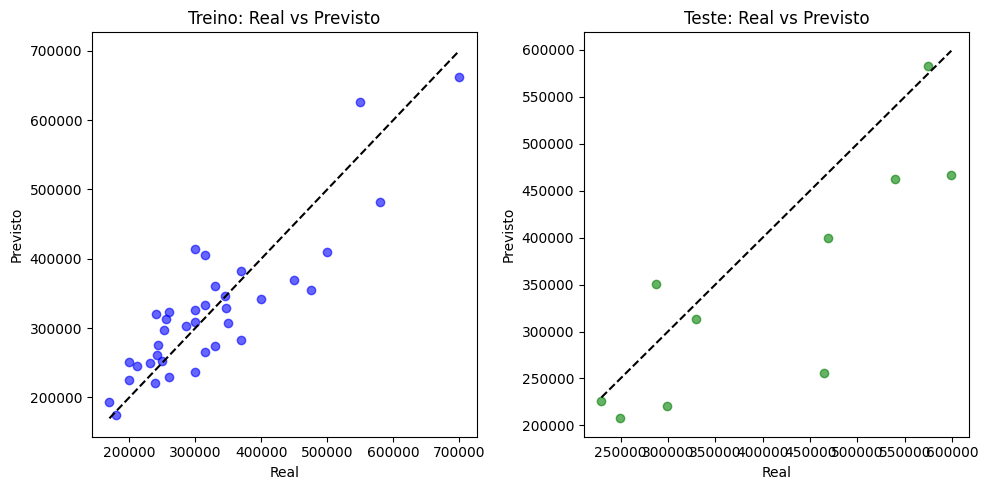

In [62]:
import matplotlib.pyplot as plt
# 7. Plotar gráfico
plt.figure(figsize=(10, 5))

# Gráfico do treino
plt.subplot(1, 2, 1)
plt.scatter(y_treino, y_treino_predito, color='blue', alpha=0.6)
plt.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--')
plt.title('Treino: Real vs Previsto')
plt.xlabel('Real')
plt.ylabel('Previsto')

# Gráfico do teste
plt.subplot(1, 2, 2)
plt.scatter(y_teste, y_teste_predito, color='green', alpha=0.6)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--')
plt.title('Teste: Real vs Previsto')
plt.xlabel('Real')
plt.ylabel('Previsto')

plt.tight_layout()
plt.show()